# Introduction to R + ggplot2

---
*Credit: Ritika Giri and the NUIT RCDS group (with minor changes and additions by Aaron Geller)*

The R package `ggplot2` is the most widely used and aesthetically pleasing graphics framework available in R. It relies on a structure called the "grammar of graphics". Essentially, it follows a layered approach to describe and construct the visualization.

Here is a handy [cheat sheet for ggplot2](https://statsandr.com/blog/files/ggplot2-cheatsheet.pdf)! Most users rely on a cheat-sheet (or Google / ChatGPT) because it is often difficult to remember the exact syntax and options.

## The grammar of graphics

![](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*mcLnnVdHNg-ikDbHJfHDNA.png){width="665"}

To build or describe any visualization with one or more dimensions, we can use the components as follows.

1.  **Data**: Always start with the data, identify the dimensions you want to visualize.

2.  **Aesthetics**: Confirm the axes based on the data dimensions, positions of various data points in the plot. Also check if any form of encoding is needed including size, shape, color and so on which are useful for plotting multiple data dimensions.

3.  **Scale:** Do we need to scale the potential values, use a specific scale to represent multiple values or a range? For example you can scale the data to log of the original values.

4.  **Geometric objects:** These are popularly known as 'geoms'. This would cover the way we would depict the data points on the visualization. Should it be points, bars, lines and so on?

5.  **Statistics:** Do we need to show some statistical measures in the visualization like measures of central tendency, spread, confidence intervals?

6.  **Facets:** Do we need to create subplots based on specific data dimensions?

7.  **Coordinate system:** What kind of a coordinate system should the visualization be based on ---should it be cartesian or polar?



## Understanding the `ggplot` Syntax

The syntax for constructing ggplots could be puzzling if you are a beginner or work primarily with base graphics. The main difference is that, unlike base graphics:

-   `ggplot` works with dataframes and not individual vectors. All the data needed to make the plot is typically contained within the dataframe supplied to the `ggplot()` function itself or can be supplied to respective geoms.

-   The second noticeable feature is that you can keep enhancing the plot by adding more layers (and themes) to an existing plot created using the `ggplot()` function

-   The order of the layers matters, the first command/layer is executed first, and so on. Sometimes, this can make a difference in your final plot.

## 1. Creating a basic figure with `ggplot`

### 1.1 Installing and loading `ggplot`

In [2]:
# install.packages("ggplot2")
library(ggplot2)

### 1.2 Initialize a basic ggplot based on the midwest dataset

In [3]:
# turn off scientific notation like 1e+06 (optional)
options(scipen=999)  

# load the data (part of the ggplot2 package)
data("midwest", package = "ggplot2")  

# display the data
head(midwest)

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,⋯,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,⋯,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,⋯,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR
566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,⋯,18.90462,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR


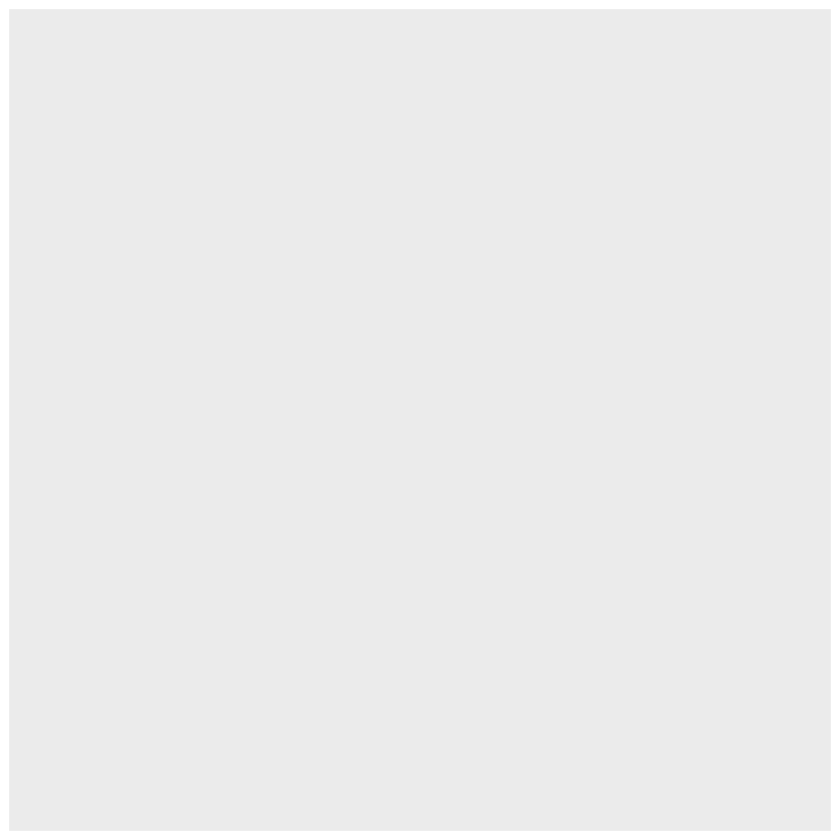

In [4]:
# Initialize a plot by calling the ggplot() function
ggplot(midwest) 

A blank ggplot is drawn. ggplot knows we want a plot with a given data set!  

Now let's tell ggplot which columns of the data we want to visualize.

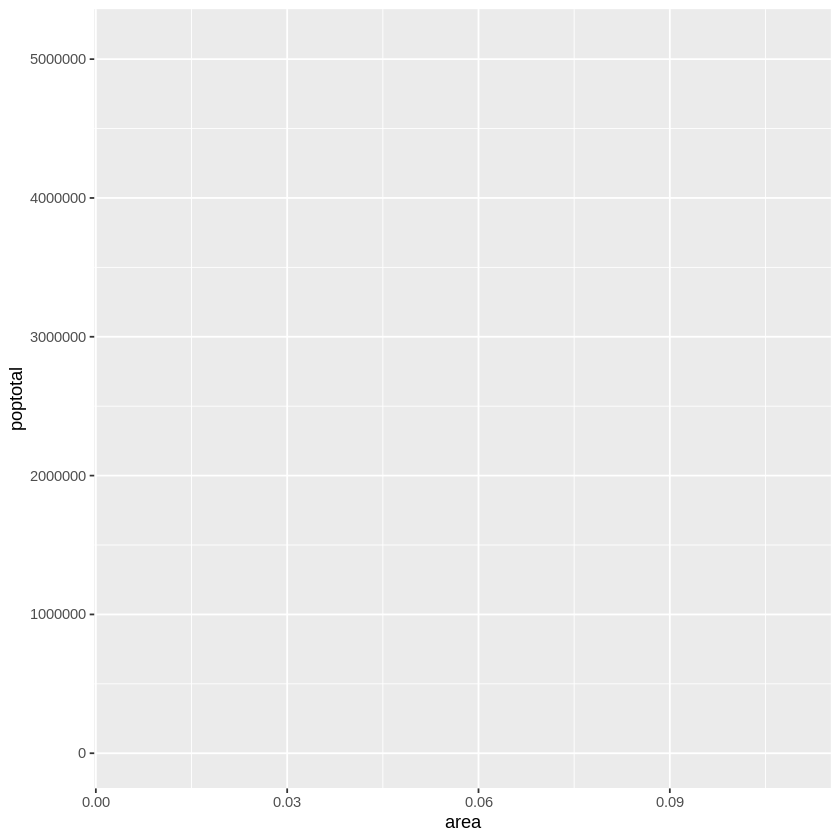

In [5]:
ggplot(midwest) + # Initialize a plot by calling the ggplot() function
    aes(x=area, y=poptotal) # area and poptotal are columns in 'midwest'

Notice how layering works with the `+` operator (not `%>%`).

Even though `x` and `y` are specified, there are no points or lines in it. This is because ggplot doesn’t assume that you want a scatterplot or a line chart to be drawn. I have only told ggplot what dataset to use and what columns should be used for `x` and `y`. I haven’t explicitly asked it to draw any points.

Any information that is part of the source dataframe has to be specified inside `aes()`.

### 1.3 Make a simple scatterplot

Let's make a scatterplot on top of the blank ggplot by adding points using a geom layer called `geom_point`.



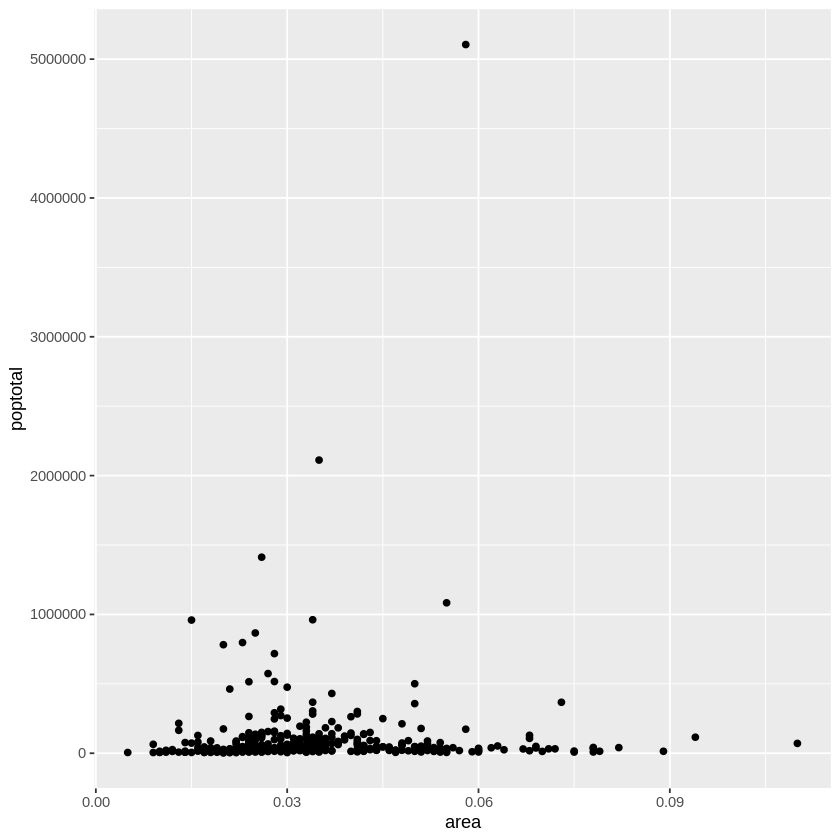

In [6]:
ggplot(midwest) + 
    aes(x=area, y=poptotal) +
    geom_point()


Now we have a basic scatterplot, where each point represents a county. However, it lacks some basic components such as the plot title, meaningful axis labels, etc. Moreover, most of the points are concentrated on the bottom portion of the plot, which is not ideal. You will see how to rectify these in upcoming steps.  But first...

### 1.4 Using other "geoms" to make various types of plots

Like `geom_point()`, there are many such geom layers such as `geom_line` , `geom_bar`, `geom_density`, `geom_histgram`, etc.  Some examples are included below.


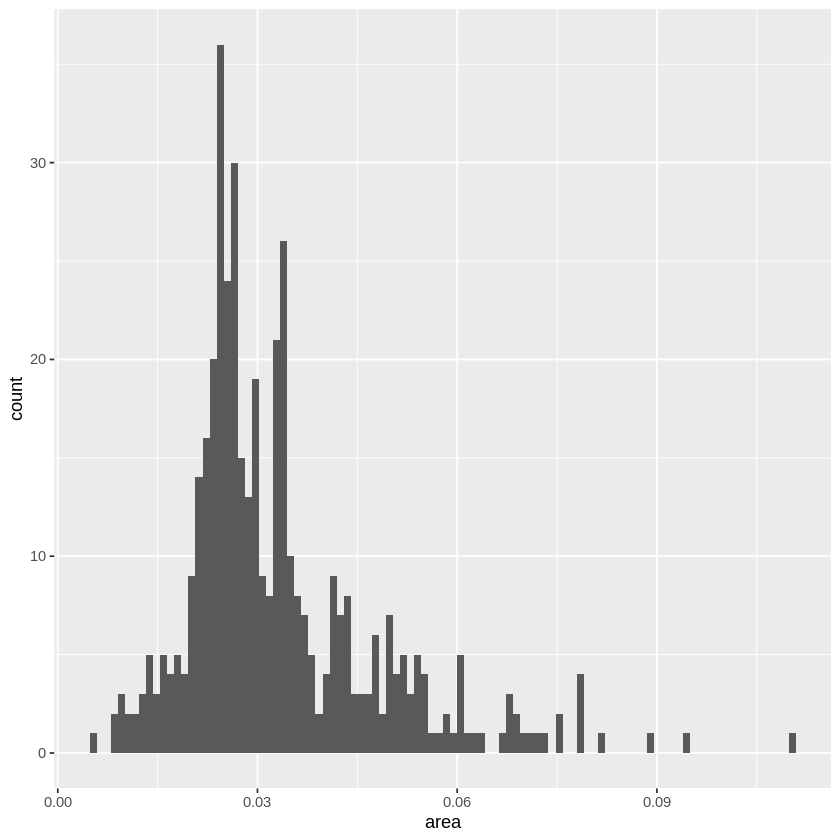

In [7]:
# histogram of county area
ggplot(midwest) + 
    aes(x=area) +
    geom_histogram(bins=100)

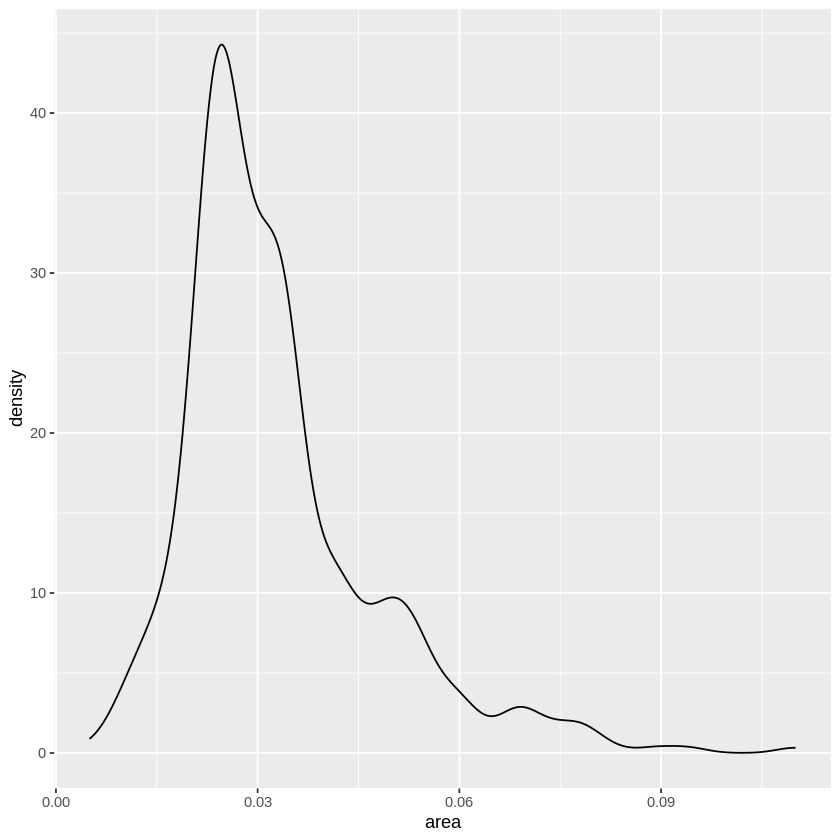

In [8]:
# density plot of county area
ggplot(midwest) + 
    aes(x=area) +
    geom_density()

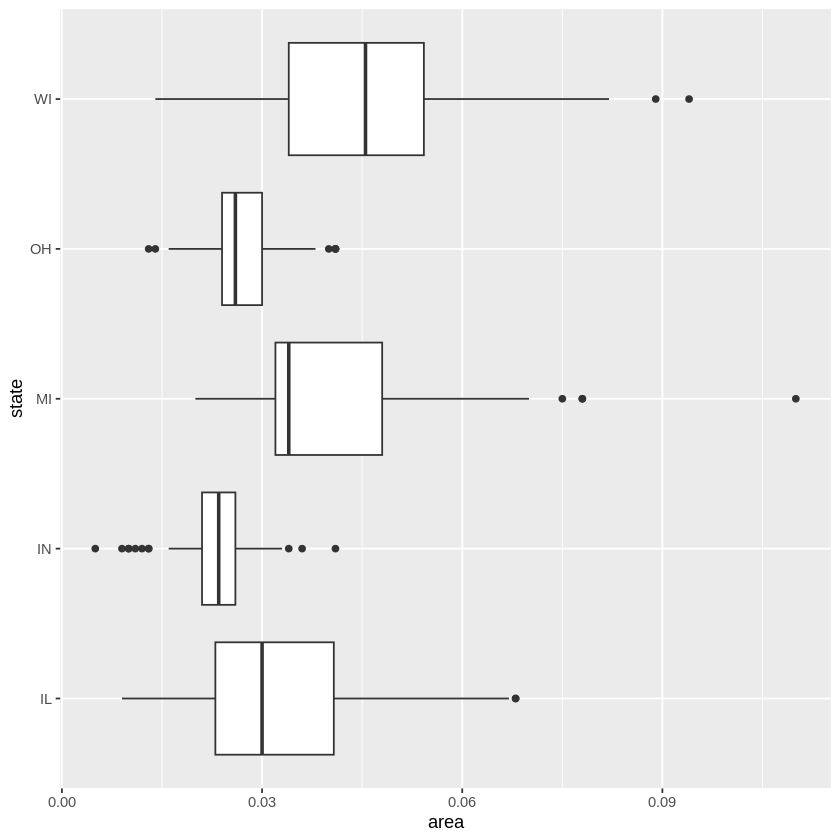

In [9]:
# a boxplot showing the area of each state
ggplot(midwest) + 
    aes(x=area, y=state) +
    geom_boxplot() 

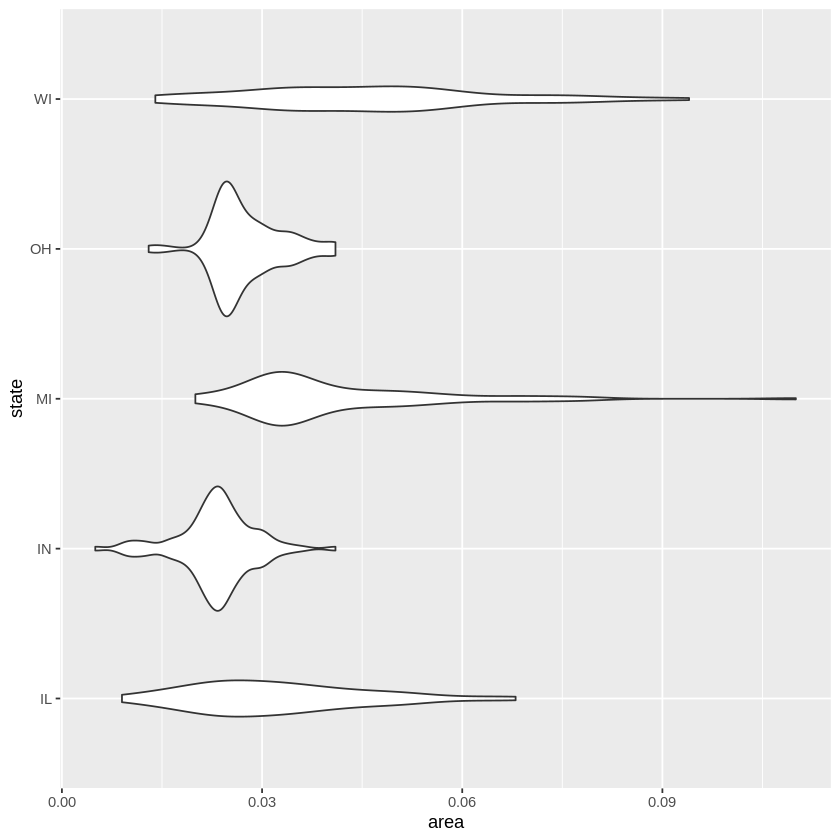

In [10]:
# a violinplot showing the area of each state
ggplot(midwest) + 
  aes(x=area, y=state) +
  geom_violin()

### EXERCISE 1

Load the `Orange` (built-in) dataset in your workspace, which contains data on the growth of orange trees.

Make a scatterplot of tree age vs. circumference.


In [11]:
data(Orange)
head(Orange)

,Tree,age,circumference
,<ord>,<dbl>,<dbl>
1,1,118,30
2,1,484,58
3,1,664,87
4,1,1004,115
5,1,1231,120
6,1,1372,142


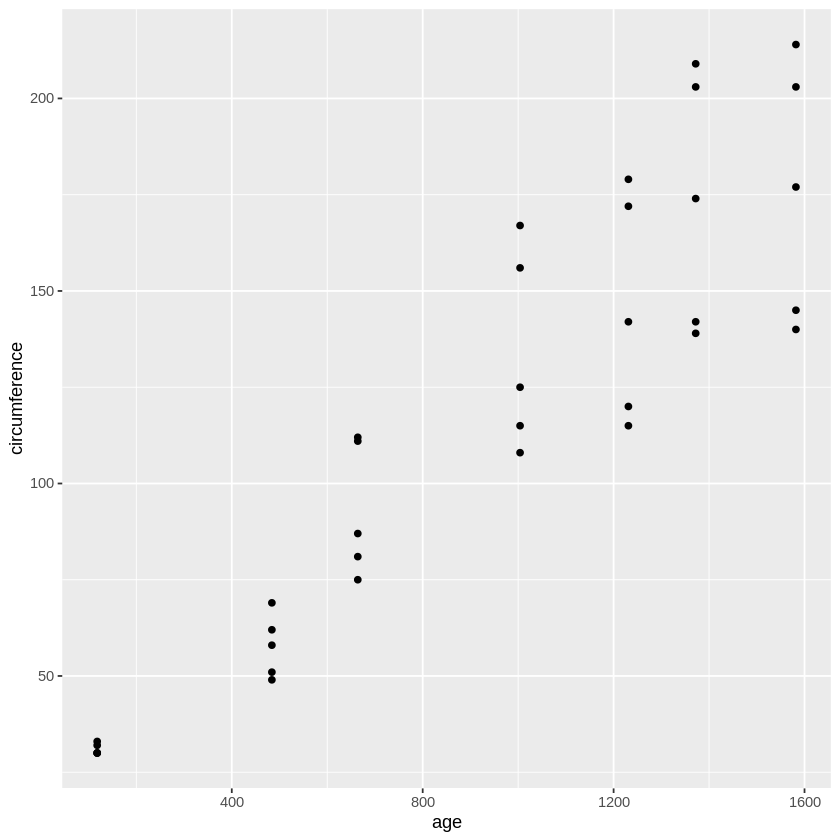

In [12]:
# create a scatterplot of the Orange age vs. circumference 
ggplot(Orange) +
    aes(x=age, y=circumference) +
    geom_point()

## 2 Customizing the axis limits

The X and Y axis limits can be controlled in 2 ways.


### 2.1 Method 1 : By deleting the points outside the range

This can be done by `scale_x_continuous()` (or the shorthand `xlim()`) and `scale_y_continuous()` (or the shorthand `ylim()`). You can pass a numeric vector of length 2 (with max and min values) or just the max and min values themselves.

Here we are using "scales".  Scales in `ggplot2` control the mapping from data to aesthetics. They take your data and turn it into something that you can see, like size, color, position or shape. They also provide the tools that let you interpret the plot: the axes and legends. You can generate plots with `ggplot2` without knowing how scales work, but understanding scales and learning how to manipulate them will give you much more control. To get an in-depth understanding of how scales work in `ggplot2` see [this book chapter on scales and guides](https://ggplot2-book.org/scales-guides).

An important property of `ggplot2` is the principle that every aesthetic in your plot is associated with exactly one scale. For instance, when you write this (as we've done above):

```
ggplot(midwest, aes(x=area, y=poptotal)) + 
    geom_point()
```

`ggplot2` adds a default scale for each aesthetic used in the plot:


```
ggplot(midwest, aes(x=area, y=poptotal)) + 
    geom_point() +
    scale_x_continuous() + 
    scale_y_continuous() 
```

*Note:* This will change lines of best fit or smoothing that you may have added via `ggplot` (as compared to lines fit to the full dataset).  In some cases, this feature might come in handy, e.g. when you wish to know how the line of best fit would change when some extreme values (or outliers) are removed.  We will cover these fit lines later.


Inside the `scale` layer, you can add limits as:

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


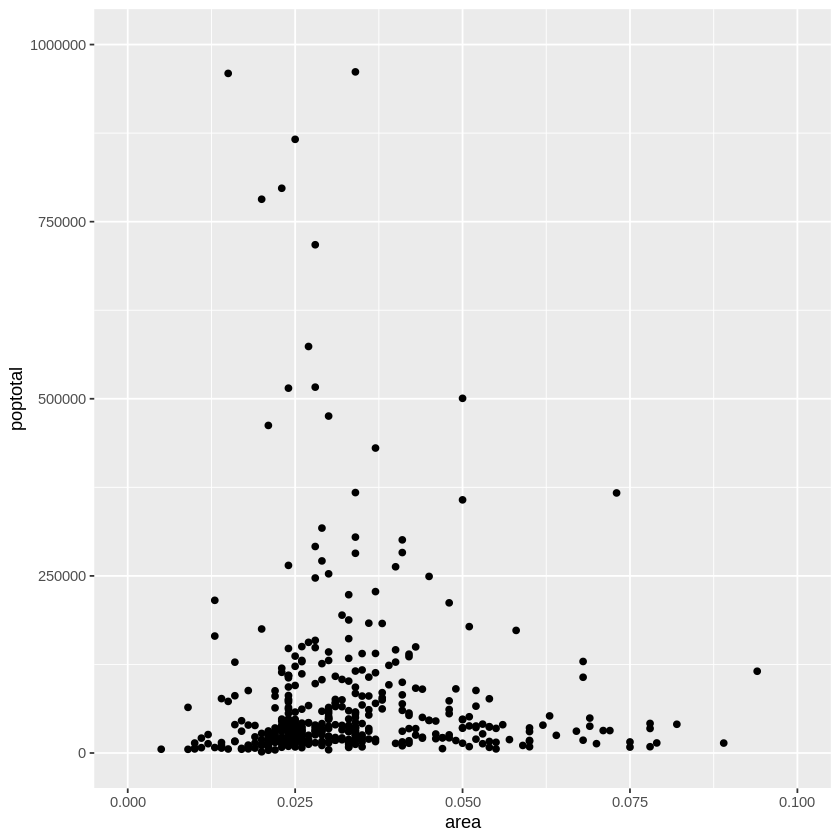

In [13]:

ggplot(midwest, aes(x=area, y=poptotal)) + 
    geom_point() +
    scale_x_continuous(limits=c(0, 0.1)) + # deletes points
    scale_y_continuous(limits=c(0, 1000000)) # deletes points


*Pro tip*: I personally do not like that `ggplot` expands beyond the limits I set.  You can force it not to do so (or define explicitly how much expansion to apply) by setting the `expand` keyword within `scale_x_continous` and/or `scale_y_continous`, e.g., `scale_x_continuous(limits=c(0, 0.1), expand=c(0,0))`.

Position scales have many more features that you can [explore](https://ggplot2-book.org/scales-position).

You can accomplish the same result with the shorthand `xlim` and `ylim` :

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


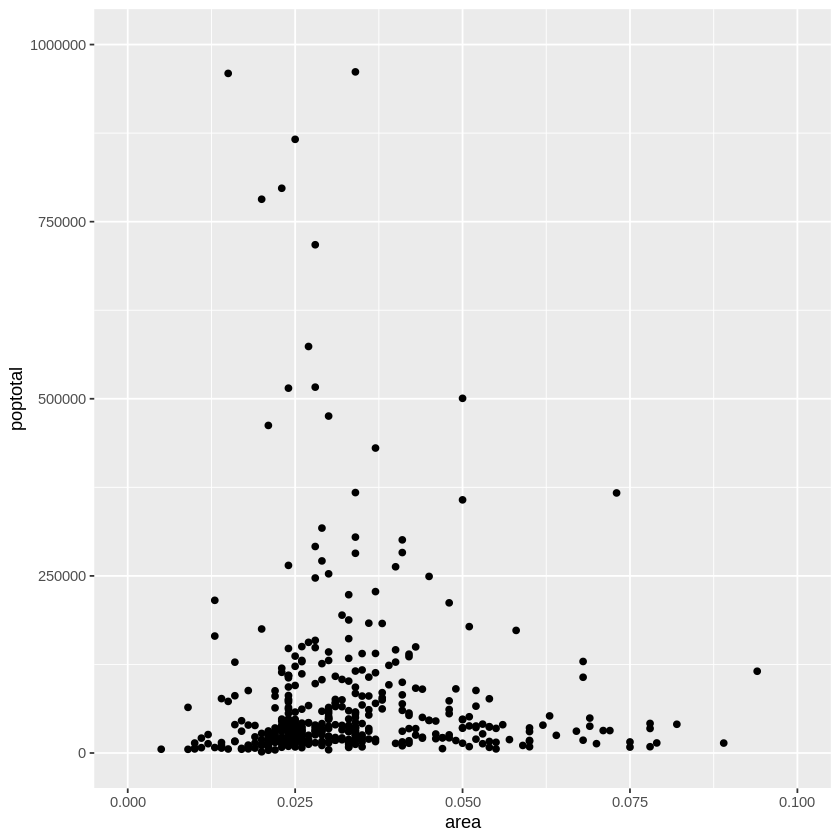

In [14]:
ggplot(midwest, aes(x=area, y=poptotal)) + # note that we can include aes in this ggplot call
    geom_point() + 
    xlim(c(0, 0.1)) + # deletes points
    ylim(c(0, 1000000))   # deletes points

### 2.2 Method 2 : Zooming In

The other method to adjust the X and Y axis is to zoom in to the region of interest *without* deleting the points. This is done using `coord_cartesian()`.

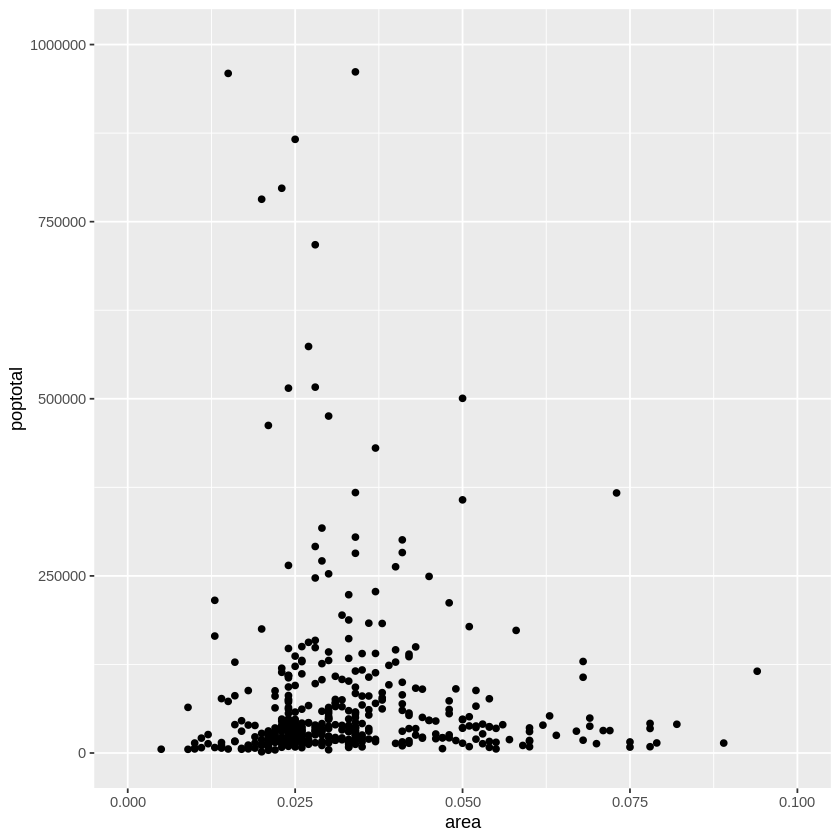

In [38]:
ggplot(midwest, aes(x=area, y=poptotal)) + 
    geom_point() + 
    coord_cartesian(xlim=c(0,0.1), ylim=c(0, 1000000))  # zooms in


### EXERCISE 2

Choose any dataset and explictly set the axis limits using any method from above, though recall which methods delete data and which don't.

Warning message:
“Removed 20 rows containing missing values (`geom_point()`).”


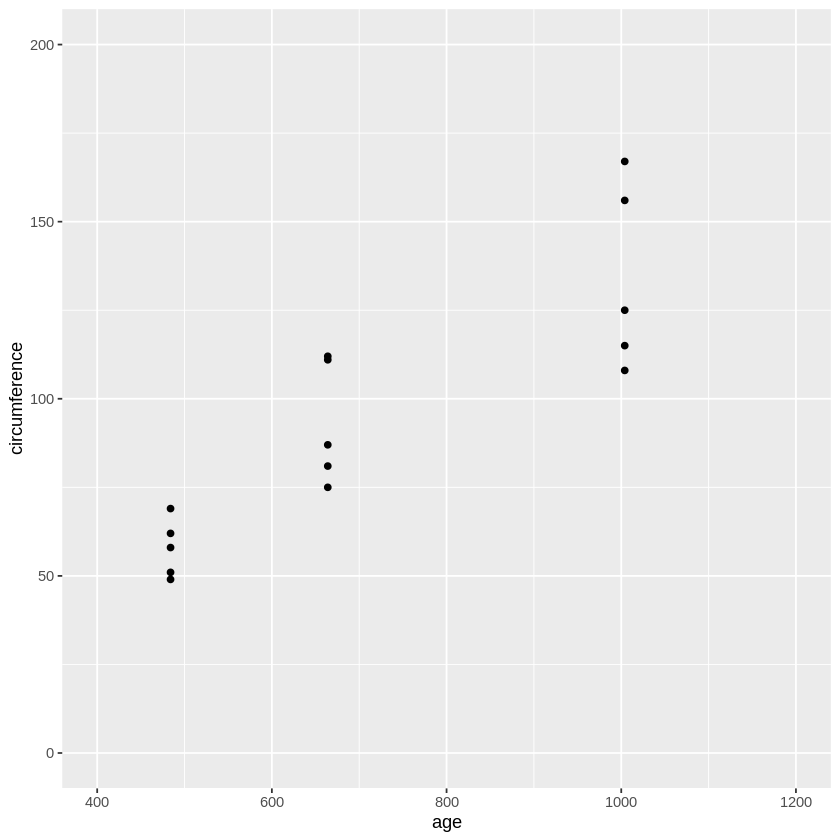

In [16]:
ggplot(Orange) +
    aes(x=age, y=circumference) +
    geom_point() + 
    scale_x_continuous(limits=c(400, 1200)) + 
    scale_y_continuous(limits=c(0, 200))


## 3. Adding titles and labels

Let's continue with our previous scatterplot of the midwest data and add the plot title and labels for the X and Y axis. This can be done in one go using the `labs()` function using the `title`, `x`, and `y` arguments. Another option is to use `ggtitle()`, `xlab()`, and `ylab()`.


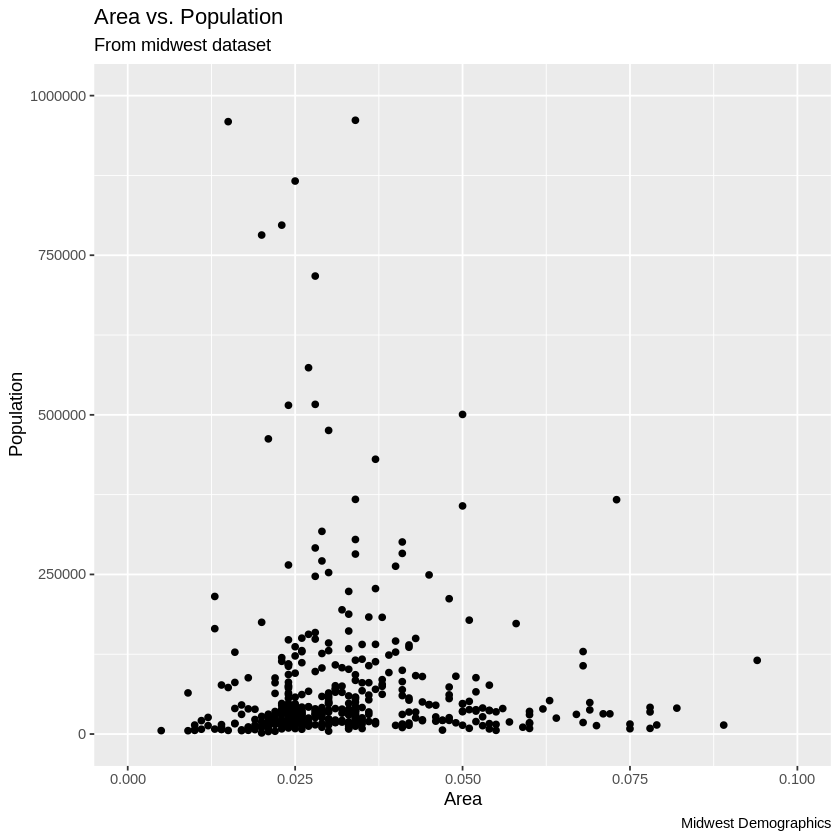

In [17]:
ggplot(midwest, aes(x=area, y=poptotal)) + 
    geom_point() + 
    coord_cartesian(xlim=c(0,0.1), ylim=c(0, 1000000))  + # zooms in
# Add Title and Labels (choose one option below and leave the other commented out)
# either using labs
    labs( 
        title="Area vs. Population", 
        subtitle="From midwest dataset", 
        y="Population", 
        x="Area", 
        caption="Midwest Demographics"
    )
# or 
    # ggtitle("Area vs. Population",  subtitle="From midwest dataset") + 
    # xlab("Area") + 
    # ylab("Population")

### EXERCISE 3

For the Orange data, the age has units of days, and the circumference has units of mm.  Add suitable axis labels and title(s) to the Orange plot that include these units.

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


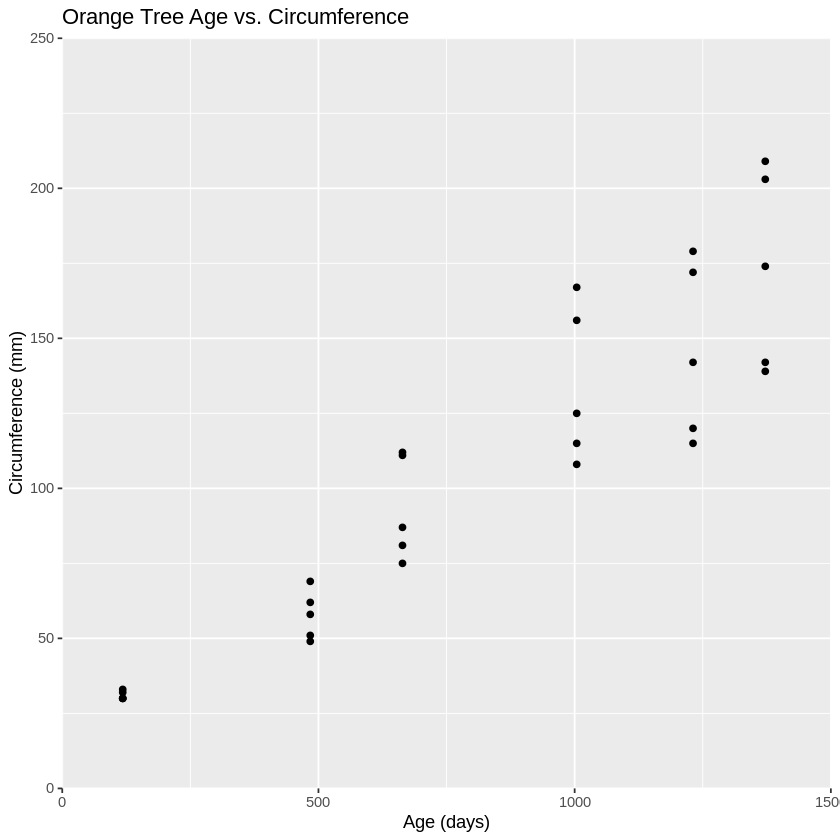

In [18]:
ggplot(Orange) +
    aes(x=age, y=circumference) +
    geom_point() + 
    scale_x_continuous(limits=c(0, 1500), expand=c(0,0)) + 
    scale_y_continuous(limits=c(0, 250), expand=c(0,0)) + 
    labs( 
        title="Orange Tree Age vs. Circumference", 
        x="Age (days)", 
        y="Circumference (mm)", 
    )

## 4. Changing aesthetics based on columns in your data

There are many components of the plot that you can customize.  Sometimes it may be helpful to define an aesthetic of your plot from the data directly.  For instance, you may want the size and/or color of your points set by a column in your data.  


### 4.1 Setting size and/or color to a single value

Before setting these aesthetics to data values, let's first look at how we can customize them with user-defined values.

In [19]:
colnames(midwest)

[1] "PID"                  "county"               "state"               
 [4] "area"                 "poptotal"             "popdensity"          
 [7] "popwhite"             "popblack"             "popamerindian"       
[10] "popasian"             "popother"             "percwhite"           
[13] "percblack"            "percamerindan"        "percasian"           
[16] "percother"            "popadults"            "perchsd"             
[19] "percollege"           "percprof"             "poppovertyknown"     
[22] "percpovertyknown"     "percbelowpoverty"     "percchildbelowpovert"
[25] "percadultpoverty"     "percelderlypoverty"   "inmetro"             
[28] "category"

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


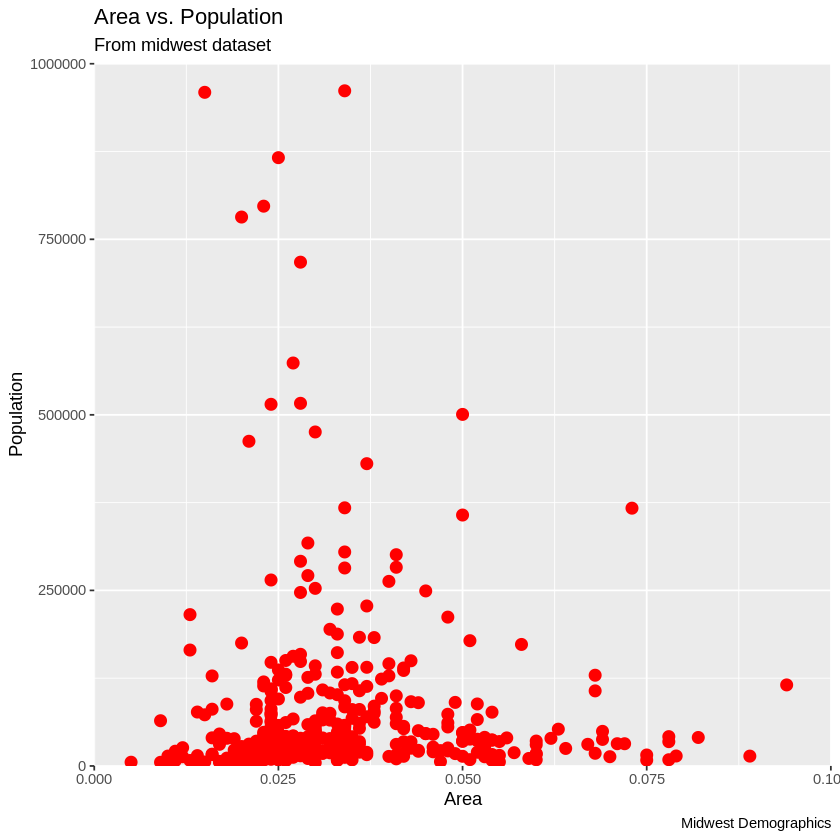

In [20]:
ggplot(midwest, aes(x=area, y=poptotal)) + 
    geom_point(size = 3, color = "red") +  #set the size and color of the points
    scale_x_continuous(limits=c(0, 0.1), expand=c(0,0)) + 
    scale_y_continuous(limits=c(0, 1000000), expand=c(0,0)) + 
    labs( 
        title="Area vs. Population", 
        subtitle="From midwest dataset", 
        y="Population", 
        x="Area", 
        caption="Midwest Demographics"
    )

### 4.2 Setting size and/or color to data values

In order to access a column in our data, we will use the `aes` keyword.  Below we will set the color based on the state, a categorical variable. 

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


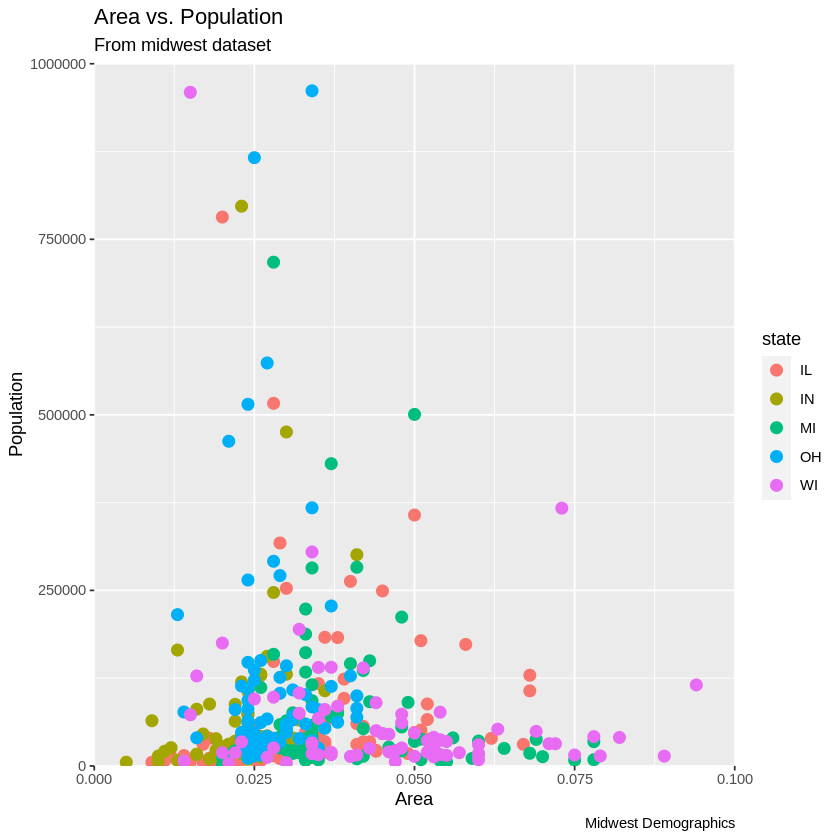

In [21]:
# here I am going to save the plot as a variable so that I can manipulate it later without repeating this code
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
    geom_point(aes(color = state), size = 3) +  #set color based on the state
    scale_x_continuous(limits=c(0, 0.1), expand=c(0,0)) + 
    scale_y_continuous(limits=c(0, 1000000), expand=c(0,0)) + 
    labs( 
        title="Area vs. Population", 
        subtitle="From midwest dataset", 
        y="Population", 
        x="Area", 
        caption="Midwest Demographics"
    )
gg

Note that`size`, `shape`, `stroke` (thickness of boundary), and `fill` (fill color) can be defined by data values within `aes`.

As an added benefit, the legend is added automatically. If needed, it can be removed by setting the `legend.position` to `None` from within a `theme()` function.  (There are many ways that you can customize the legend.)

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


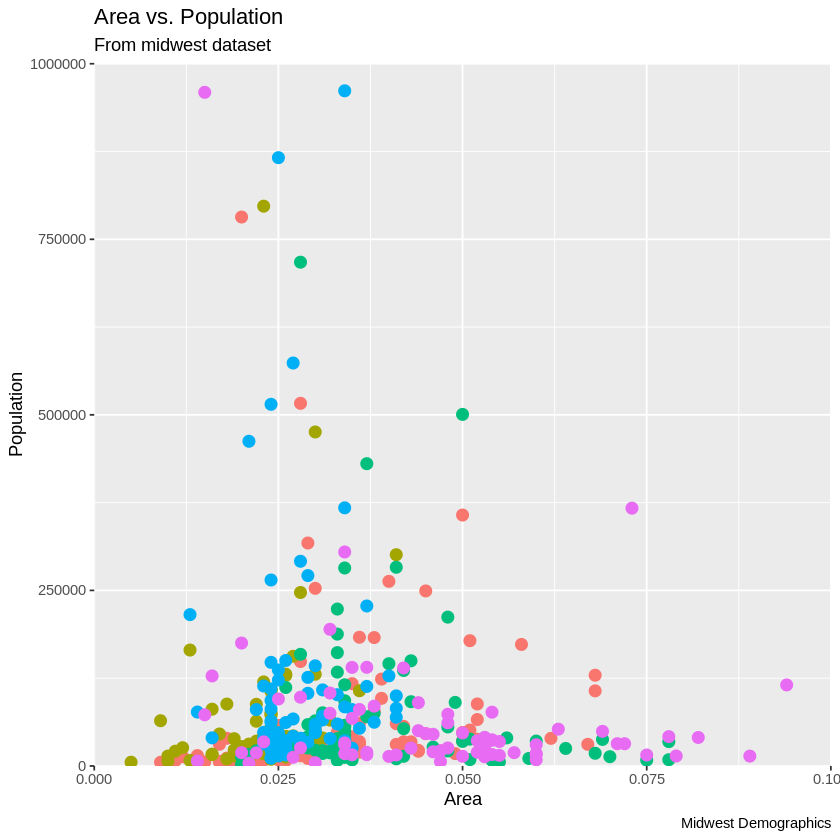

In [22]:
gg + theme(legend.position="None")  # remove legend (though for a plot like this, you probably would want to keep it!)


We can also set the size based on a column in the data.  In the example below, we set the size by the percent of college-educated people (`percollege`).

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


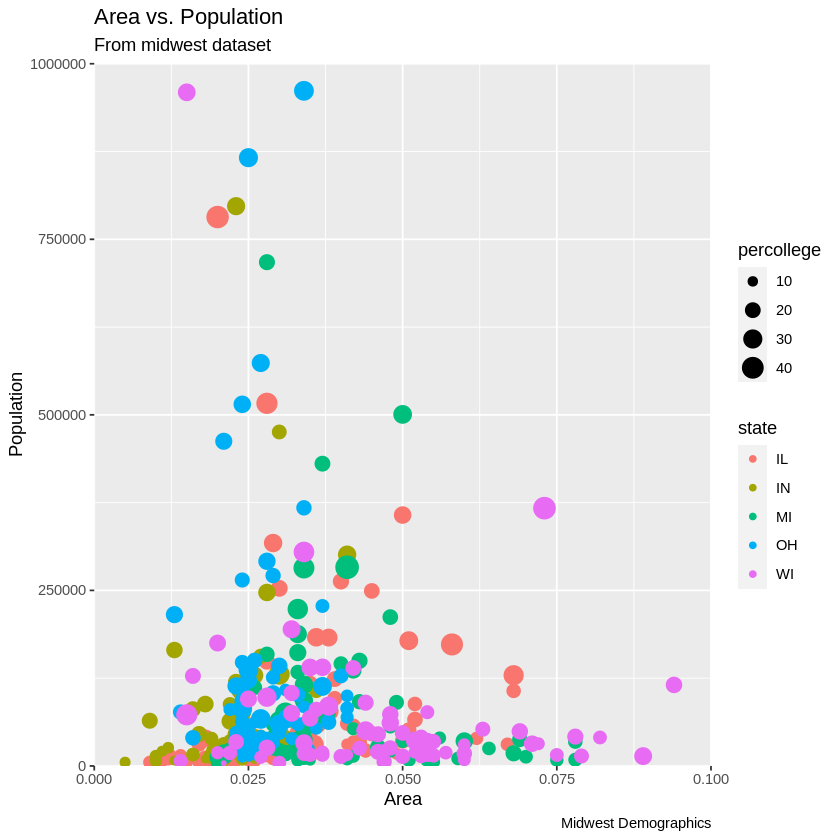

In [23]:
ggplot(midwest, aes(x=area, y=poptotal)) + 
    geom_point(aes(color = state, size = percollege)) +  #set color based on the state and size based on percent college educated
    scale_x_continuous(limits=c(0, 0.1), expand=c(0,0)) + 
    scale_y_continuous(limits=c(0, 1000000), expand=c(0,0)) + 
    labs( 
        title="Area vs. Population", 
        subtitle="From midwest dataset", 
        y="Population", 
        x="Area", 
        caption="Midwest Demographics"
    )

### 4.2.1 Scales for color

Just like you can add scales for position, you can also add [scales for color](https://ggplot2-book.org/scales-colour).

The default scale for continuous fill scales is `scale_fill_continuous()` which in turn defaults to `scale_fill_gradient()`. As a consequence, these three commands produce the same plot using a gradient scale:

```

gg

gg + scale_fill_continuous()

gg + scale_fill_gradient()

```

You can change the color palette entirely using a different color scale:


Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


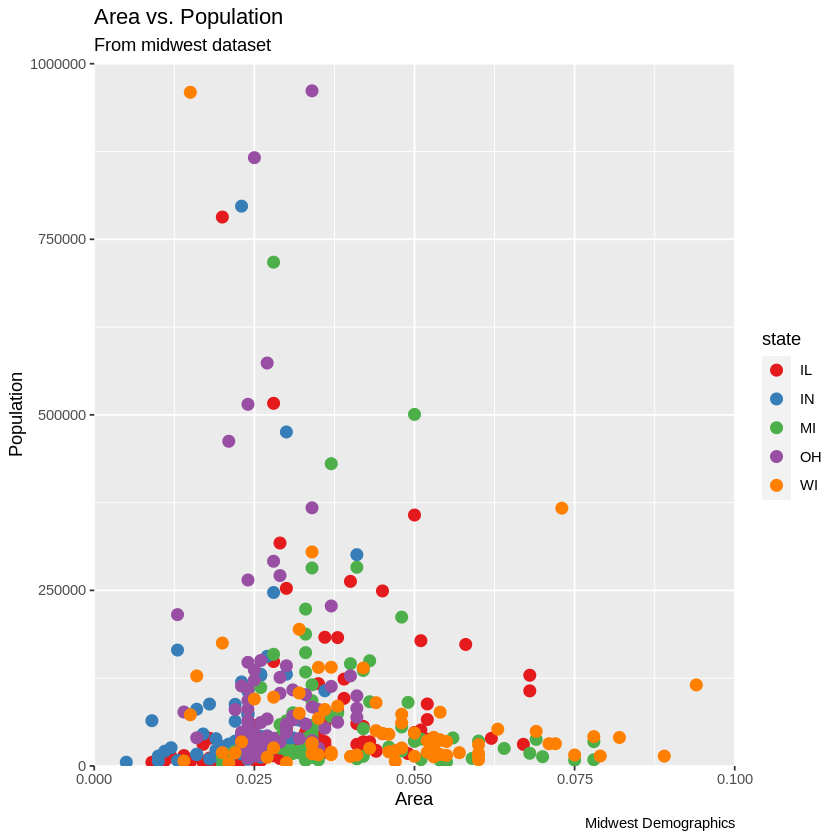

In [24]:
gg + scale_colour_brewer(palette = "Set1")  # change color palette


More of such palettes can be found in the [`RColorBrewer`](https://cran.r-project.org/web/packages/RColorBrewer/index.html) library.  Also the [`ggsci`](https://cran.r-project.org/web/packages/ggsci/vignettes/ggsci.html) package offers a collection of high-quality color palettes inspired by colors used in scientific journals, data visualization libraries, science fiction movies, and TV shows. 

Use care when when selecting colors for your visualizations, and take care to make your colors accessible for people with color visioin deficiency; [see here for an article with tips on choosing colors for your scientific figures](https://sites.northwestern.edu/researchcomputing/2022/05/20/how-to-choose-a-color-scheme-for-your-scientific-figure/).


### EXERCISE 4

Color the points in the Orange data by the `Tree` column, and change the size of the points to a constant value.


Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


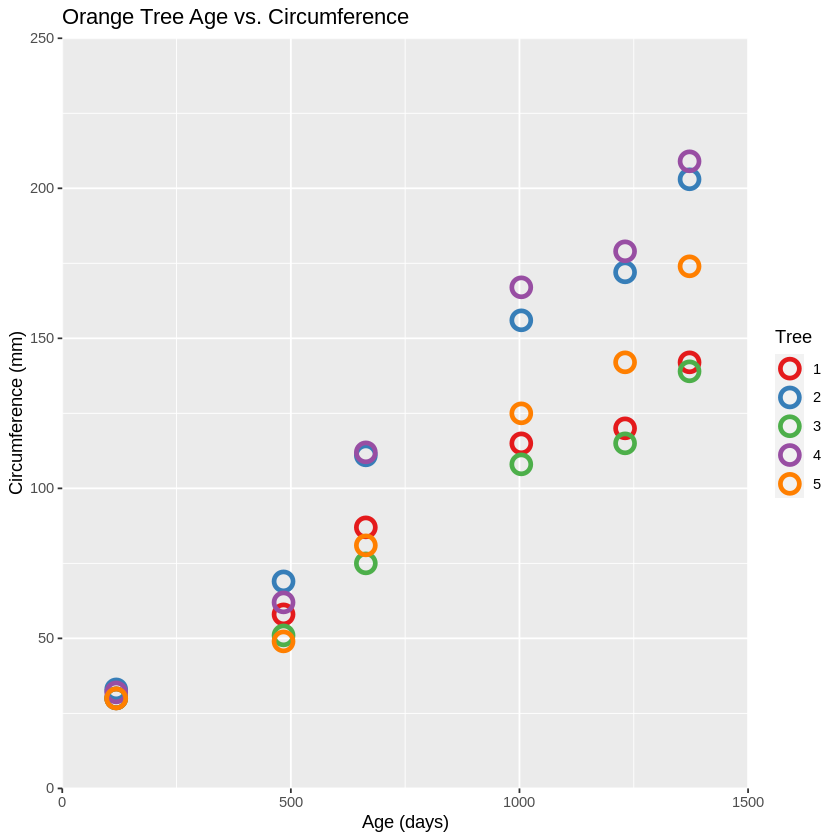

In [39]:
# define the levels in the Tree column so that the legend is in the correct order
Orange$Tree <- factor(Orange$Tree, levels = c(1,2,3,4,5))


gg_orange <- ggplot(Orange) +
    aes(x=age, y=circumference, color=Tree) +
    geom_point(size=4, shape=1, stroke=2) + # I created open circles
    scale_colour_brewer(palette = "Set1") + 
    scale_x_continuous(limits=c(0, 1500), expand=c(0,0)) + 
    scale_y_continuous(limits=c(0, 250), expand=c(0,0)) + 
    labs( 
        title="Orange Tree Age vs. Circumference", 
        x="Age (days)",
        y="Circumference (mm)", 
    )

gg_orange

# 5. Themes

`ggplot2` has many built in styles, aka themes, for plotting that define things like the background color, axis style, grid lines, etc.  [Here is a list of available themes.](https://ggplot2.tidyverse.org/reference/ggtheme.html)  Themes can also be [customized](https://rpubs.com/mclaire19/ggplot2-custom-themes), allowing for a myriad of [possibilities](https://ggplot2.tidyverse.org/reference/theme.html).

Let's explore a few of the built in themes.

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


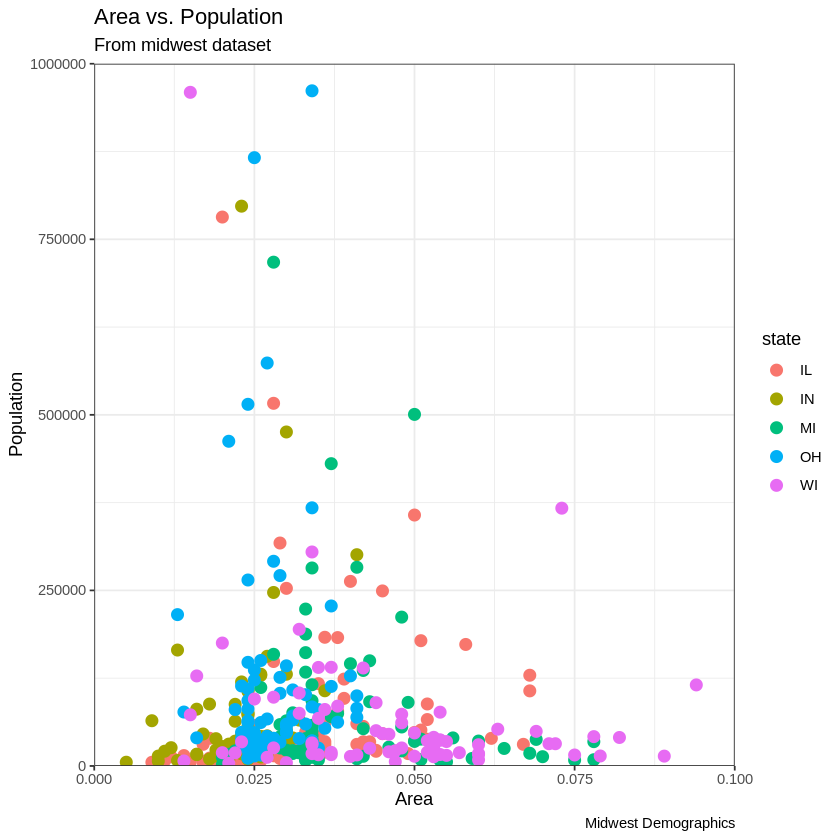

In [26]:
# start with the gg plot object from above
# use the "bw" theme
gg + theme_bw()

You can also use the [`theme()`](https://ggplot2.tidyverse.org/reference/theme.html) element to customize the style further, including changing fonts.  

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


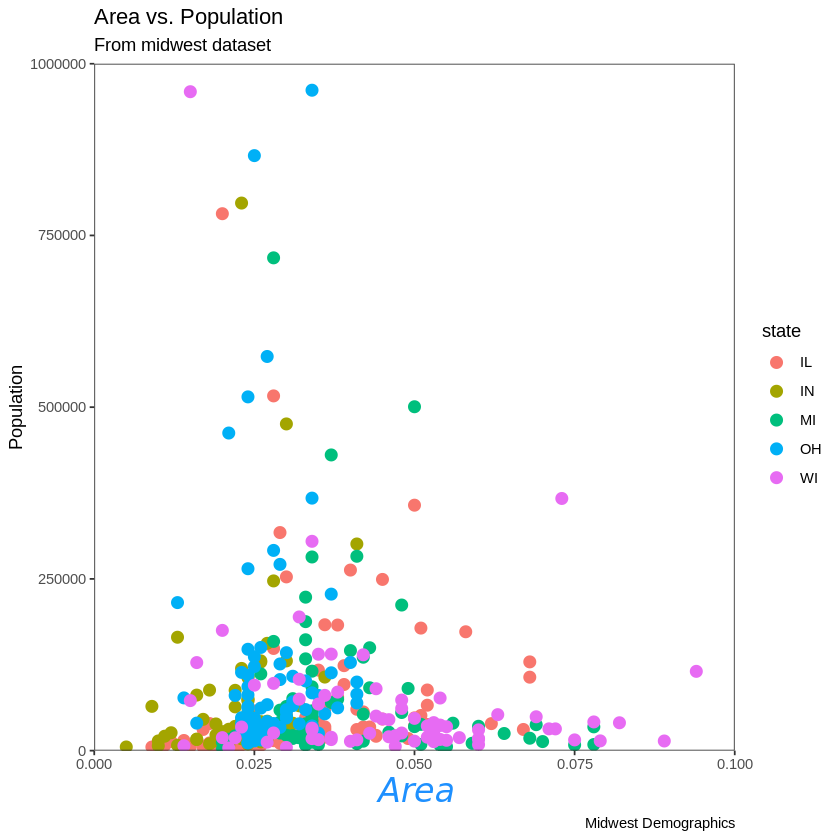

In [27]:
# add some customization to remove the grid lines and change the font
gg + 
    theme_bw() + 
    theme(
        panel.grid.major = element_blank(), # Remove major grid lines
        panel.grid.minor = element_blank(), # Remove minor grid lines
        axis.title.x = element_text(        # change the font on the x axis
            color="dodgerblue", 
            size=20, 
            face="italic", 
            family="Comic Sans MS")
    )


### EXERCISE 5

Try a different theme and add some customization to your Orange Trees plot. 

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


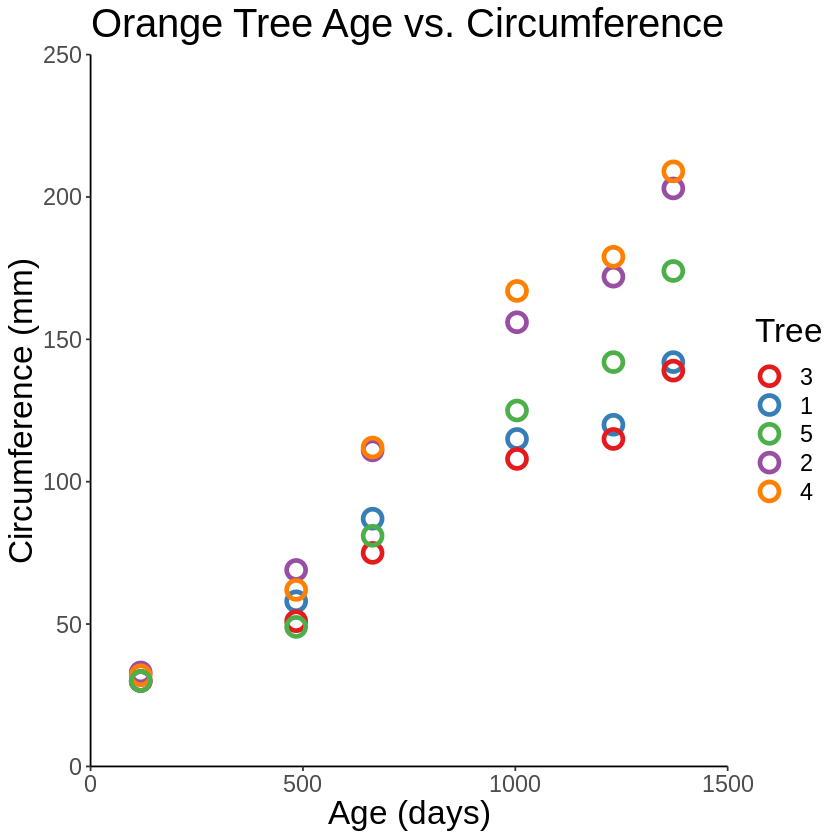

In [28]:
# increase all the fonts
gg_orange + 
    theme_classic() + 
    theme(
        plot.title = element_text(size=24),    # plot title font
        axis.title = element_text(size=20),    # axis title font
        axis.text = element_text(size=14),     # axis tick font
        legend.title = element_text(size=20),   # Legend title
        legend.text = element_text(size=14)     # Legend text

    )

# 6. Adding statistics

`ggplot2` has many options for adding fit lines to your data.  First, we'll add a smoothing layer using [`geom_smooth()`](https://ggplot2.tidyverse.org/reference/geom_smooth.html). We'll set the `method` to `lm` (short for [*linear model*](http://r-statistics.co/Linear-Regression.html)) to draw a line of best fit.  Let's work with the Orange Tree data here.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


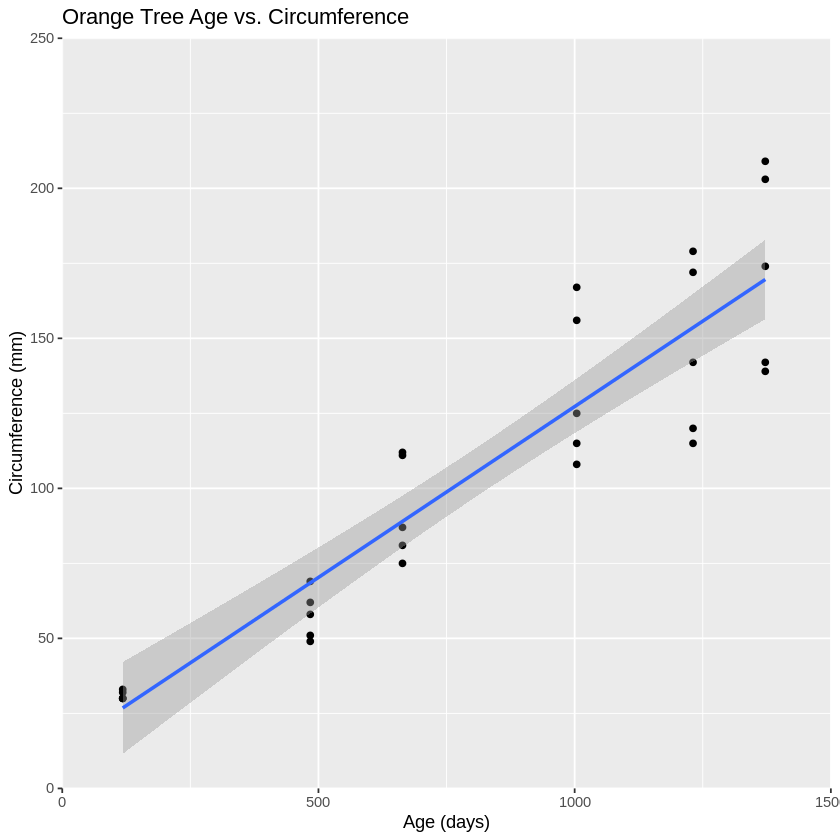

In [29]:
# redefine the plot here and save it to a variable so that I can use it later
gg_orange <- ggplot(Orange) +
    aes(x=age, y=circumference) +
    geom_point() + 
    scale_x_continuous(limits=c(0, 1500), expand=c(0,0)) + 
    scale_y_continuous(limits=c(0, 250), expand=c(0,0)) + 
    labs( 
        title="Orange Tree Age vs. Circumference", 
        x="Age (days)", 
        y="Circumference (mm)", 
    )
    

# add the fit line and show the plot
gg_orange + geom_smooth(method="lm")  # set se=FALSE to turnoff confidence bands


The line of best fit is in blue, and the confidence bands are shown in gray. 

*Note:* The fit can change based on how you Zoom into the plot. If you adjust the axis limits by zooming in (e.g., using `coord_cartesian()` ), this should not change the fit.  However, if you use `xlim()` and `ylim()` or `scale_x_continous()` and `scale_y_continous()`, you will delete points, and that will change the fit. 

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


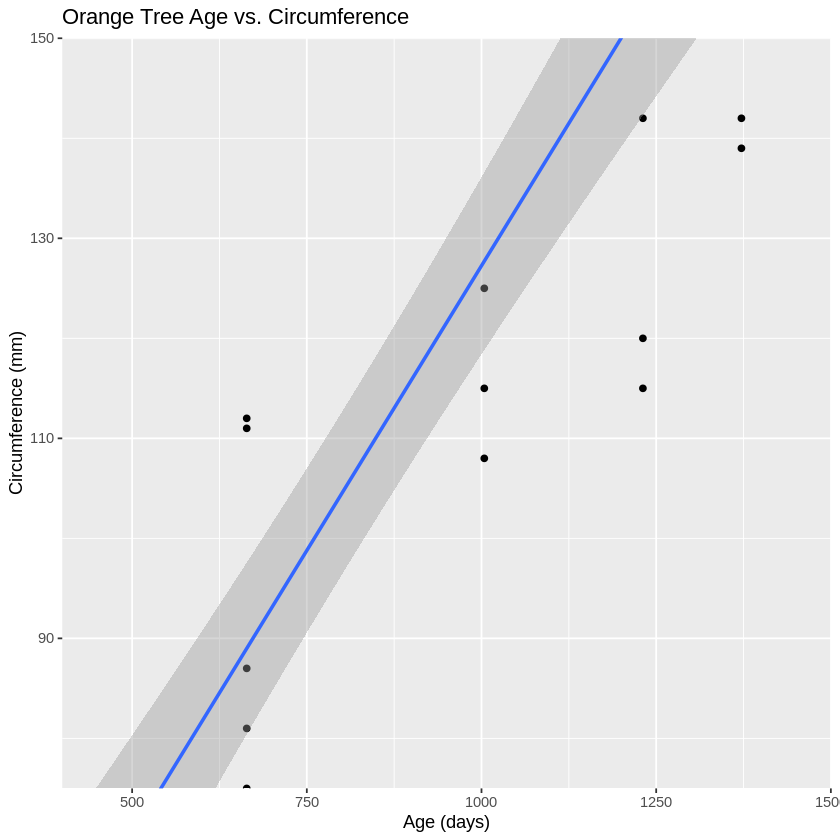

In [30]:
# Zoom in on the x axis without deleting points (does not change the fit)
gg_orange + 
    coord_cartesian(
        xlim=c(400,1500), 
        ylim=c(75, 150)
    )  +
    geom_smooth(method="lm")  

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 22 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 22 rows containing missing values (`geom_point()`).”


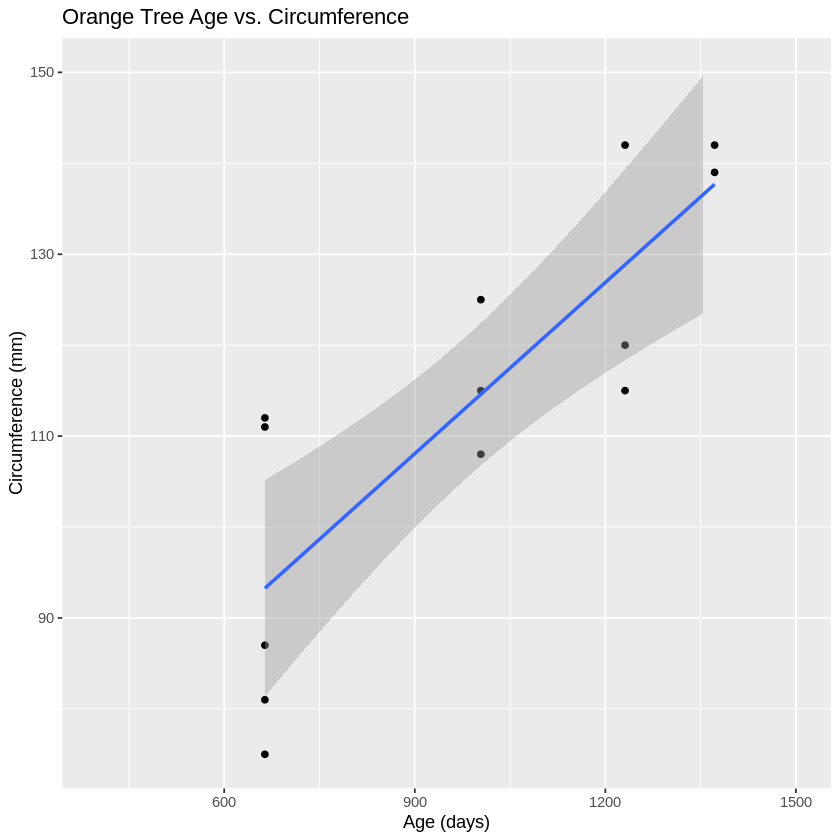

In [31]:
# Change the x axis limits by deleting points (changes the fit)
gg_orange + 
    xlim(400,1500) +
    ylim(75,150) +
    geom_smooth(method="lm")  

### EXERCISE 6

Try a smooth (non-linear) fit to the plot above? Hint: use method `loess`.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


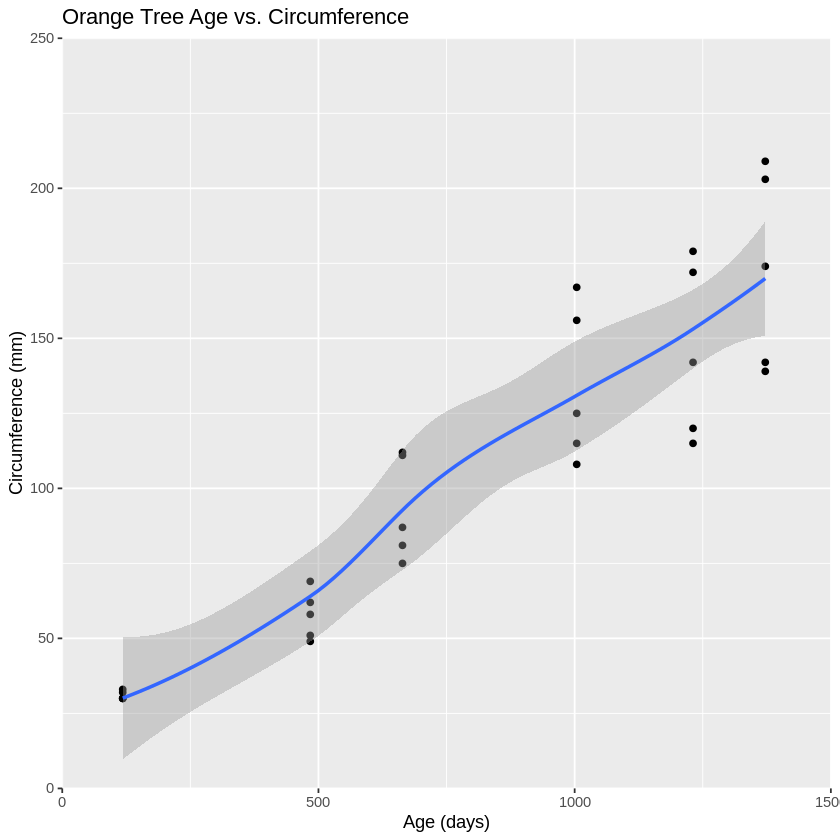

In [32]:
gg_orange + geom_smooth(method="loess")

# 7. Separating by Facets

Maybe we want to separate out the different Orange tree species into individual panels; you can do this with facets, and you have two built-in options:. 
- [`facet_grid()`](https://ggplot2.tidyverse.org/reference/facet_grid.html), which enforces a grid (matrix) layout with rows and columns (and fully populates it even if there are empty panles).  This is a great option if you have two discrete variables and want to separate your data based on both.  
- [`facet_wrap()`](https://ggplot2.tidyverse.org/reference/facet_wrap.html), which is meant for separating your data by only one variable (and has more flexibility in the panel layout).

For this example, we'll use `facet_wrap()` on the `Tree` column.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


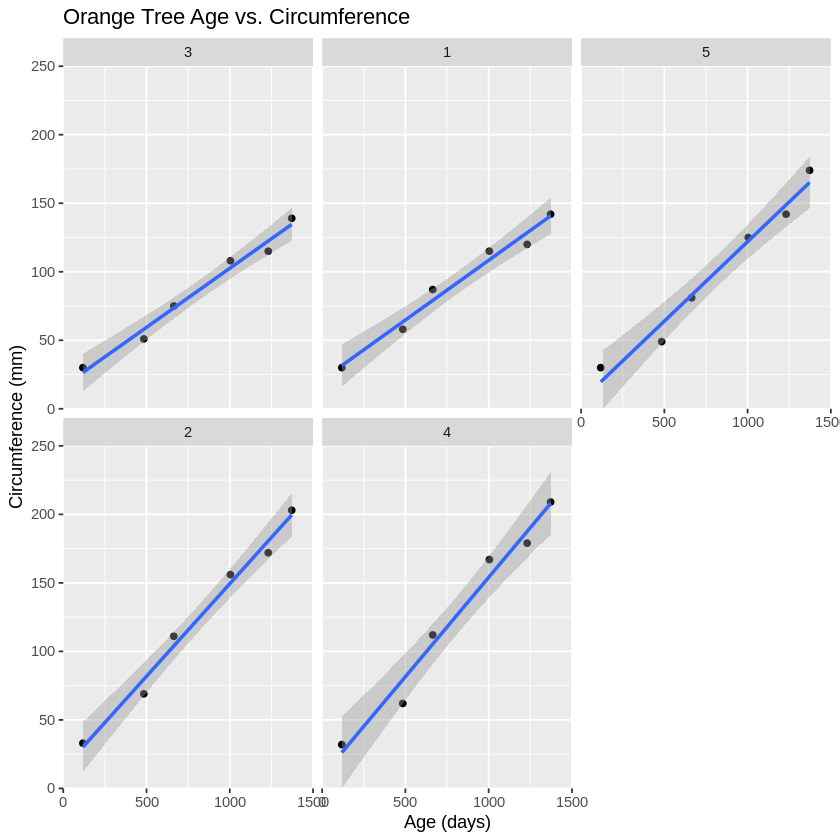

In [33]:
gg_orange + 
    facet_wrap(vars(Tree)) +  # separate into facets by Tree species number (note, you can use the nrow and/or ncol keys to customize the layout)
    geom_smooth(method="lm")  # add in fit lines (to all panels)

### EXERCISE 7

Use `facet_grid()` instead.

`geom_smooth()` using formula = 'y ~ x'


Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


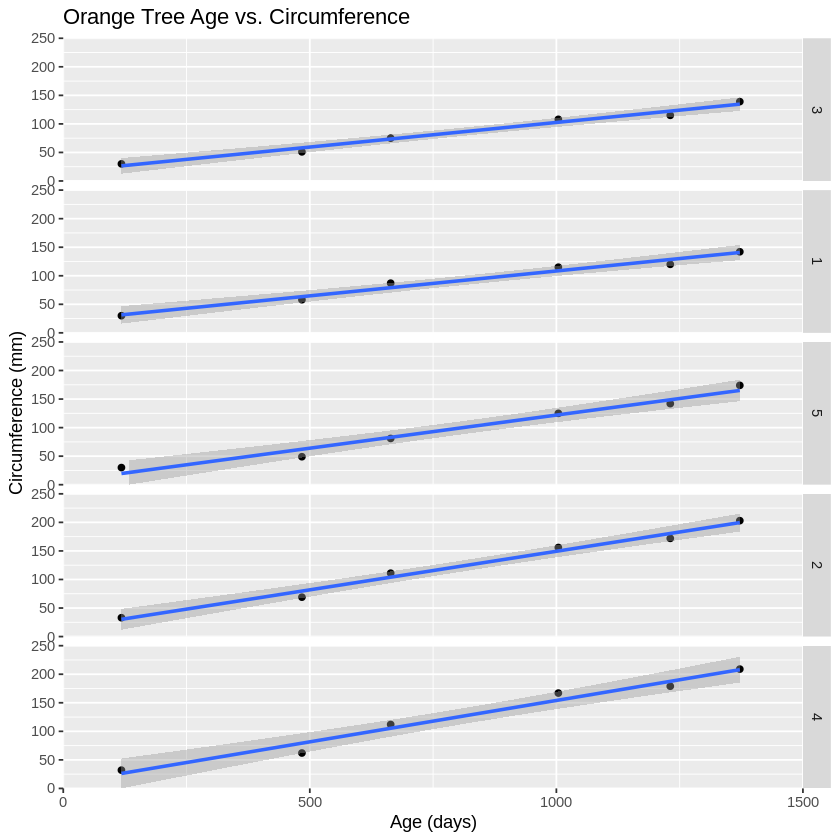

In [34]:
gg_orange + 
    facet_grid(vars(Tree)) +  # separate into facets by Tree species number
    geom_smooth(method="lm")  # add in fit lines (to all panels)

# 8. Saving Your Figure

If you want to include your figure in a publication, you need to save it to a file.  You can do this with [`ggsave()`](https://ggplot2.tidyverse.org/reference/ggsave.html).  Below we will save the figure in PDF format using the ggplot2 defaults (though note that you can customize many aspects of how the figure is saved).

In [35]:
ggsave(
    "orange_trees.pdf", # file name (and extension, to define the device used to save the figure)
    gg_orange,          # figure to save (if you don't include it, this will save the last figure you created)
    width = 8.5,        # width of the plot
    height = 5,         # height of the plot
    units = 'in'        # units for the width and height
)

Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”
